In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle

In [2]:
penguins_df = pd.read_csv("noisy_datasets/penguins.csv")
diamonds_df = pd.read_csv("noisy_datasets/diamond.csv")
emissions_df = pd.read_csv("noisy_datasets/emissions_by_country.csv")

print("Penguin Data \n", penguins_df.describe())
print("\nDiamond Data \n", diamonds_df.describe())
print("\nEmissions Dataset\n", emissions_df.describe())
emissions_df.info()

Penguin Data 
        calorie requirement  average sleep duration  bill_length_mm  \
count           344.000000              344.000000      337.000000   
mean           5270.002907               10.447674       45.494214   
std            1067.959116                2.265895       10.815787   
min            3504.000000                7.000000       32.100000   
25%            4403.000000                9.000000       39.500000   
50%            5106.500000               10.000000       45.100000   
75%            6212.750000               12.000000       49.000000   
max            7197.000000               14.000000      124.300000   

       bill_depth_mm  flipper_length_mm  body_mass_g         year  
count     333.000000         336.000000   339.000000   342.000000  
mean       18.018318         197.764881  4175.463127  2008.035088  
std         9.241384          27.764491   858.713267     0.816938  
min        13.100000          10.000000   882.000000  2007.000000  
25%        15.

In [3]:
penguins_df.info()
penguins_df = penguins_df.dropna(subset=['species', 'island', 'gender'])
penguins_df = penguins_df.fillna(penguins_df.select_dtypes(include='number').mean())
penguins_df[['species', 'island', 'gender']] = penguins_df[['species', 'island', 'gender']].applymap(str.lower)
penguins_df = penguins_df.dropna(subset=['species', 'island', 'gender'])
penguins_df = penguins_df.fillna(penguins_df.select_dtypes(include='number').mean())
penguins_df[['species', 'island', 'gender']] = penguins_df[['species', 'island', 'gender']].applymap(str.lower)
Q1 = penguins_df.quantile(0.25)
Q3 = penguins_df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = pd.DataFrame(False, index=penguins_df.index, columns=penguins_df.columns)
for column in penguins_df.select_dtypes(include='number').columns:
    outliers[column] = (penguins_df[column] < lower_bound[column]) | (penguins_df[column] > upper_bound[column])
for column in penguins_df.select_dtypes(include='number').columns:
    penguins_df[column] = penguins_df[column].where(~outliers[column], penguins_df[column].median())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   species                 333 non-null    object 
 1   island                  334 non-null    object 
 2   calorie requirement     344 non-null    int64  
 3   average sleep duration  344 non-null    int64  
 4   bill_length_mm          337 non-null    float64
 5   bill_depth_mm           333 non-null    float64
 6   flipper_length_mm       336 non-null    float64
 7   body_mass_g             339 non-null    float64
 8   gender                  327 non-null    object 
 9   year                    342 non-null    float64
dtypes: float64(5), int64(2), object(3)
memory usage: 27.0+ KB


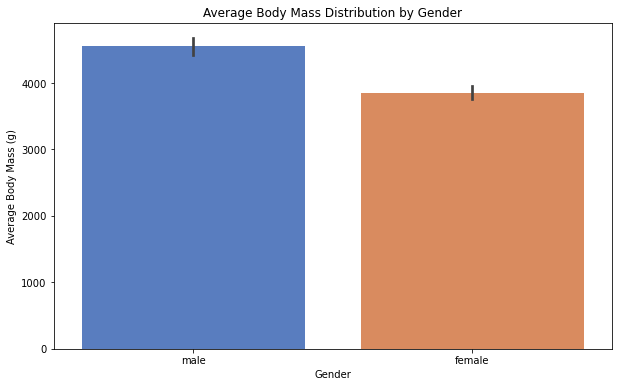

In [4]:
plt.figure(figsize=(10, 6))
sns.barplot(x='gender', y='body_mass_g', data=penguins_df, estimator=np.mean, palette='muted')
plt.title('Average Body Mass Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Body Mass (g)')
plt.show()

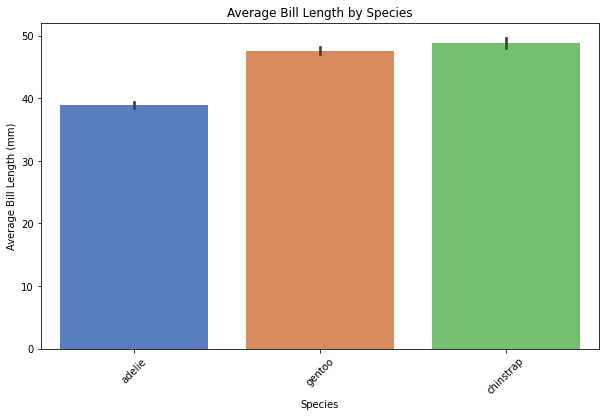

In [5]:
plt.figure(figsize=(10, 6))
sns.barplot(x='species', y='bill_length_mm', data=penguins_df, estimator=np.mean, palette='muted')
plt.title('Average Bill Length by Species')
plt.xlabel('Species')
plt.ylabel('Average Bill Length (mm)')
plt.xticks(rotation=45)
plt.show()


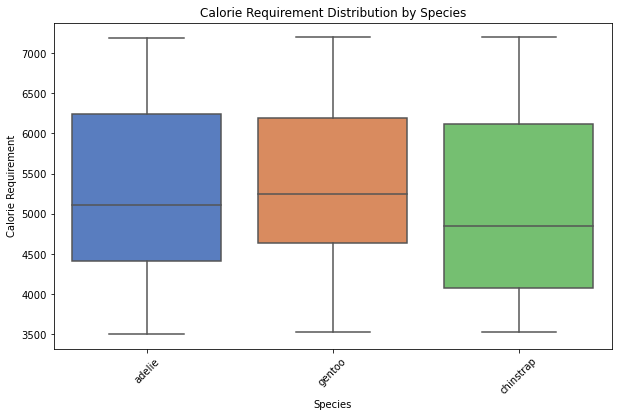

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='calorie requirement', data=penguins_df, palette='muted')
plt.title('Calorie Requirement Distribution by Species')
plt.xlabel('Species')
plt.ylabel('Calorie Requirement')
plt.xticks(rotation=45)
plt.show()


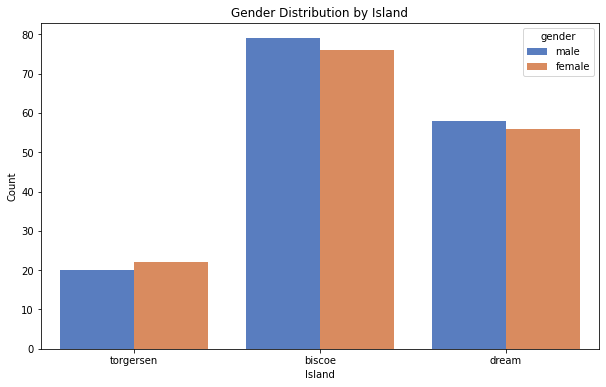

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x='island', hue='gender', data=penguins_df, palette='muted')
plt.title('Gender Distribution by Island')
plt.xlabel('Island')
plt.ylabel('Count')
plt.show()


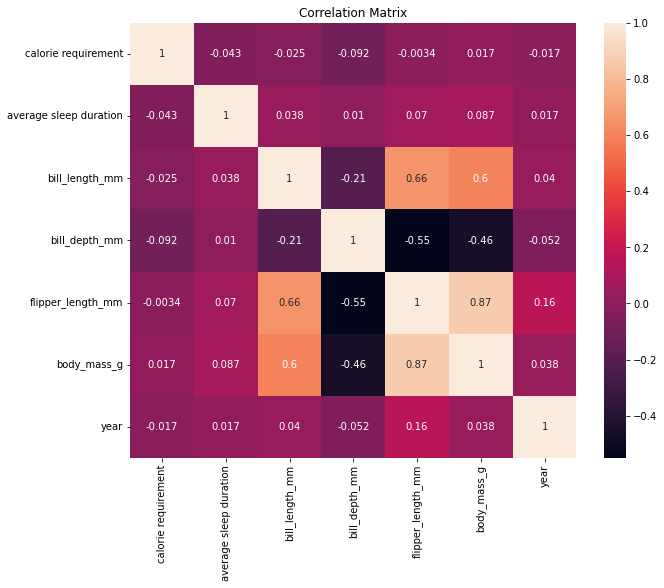

In [8]:
correlation_matrix = penguins_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [9]:
penguins_df = pd.get_dummies(penguins_df, columns=['species', 'island'], drop_first=False)
penguins_df['gender_target'] = penguins_df['gender'].map({'female': 0, 'male': 1})
correlation_matrix = penguins_df.corr()
target_correlation = correlation_matrix['gender_target']
print(target_correlation)
threshold = 0.1 
low_correlation_features = target_correlation[target_correlation.abs() < threshold].index.tolist()
print(low_correlation_features)
corelated_df = penguins_df.drop(columns=low_correlation_features)
corelated_df.head(5)

calorie requirement      -0.015871
average sleep duration    0.083965
bill_length_mm            0.364078
bill_depth_mm             0.368999
flipper_length_mm         0.273502
body_mass_g               0.436622
year                      0.003394
species_adelie           -0.021469
species_chinstrap         0.003139
species_gentoo            0.019557
island_biscoe             0.009678
island_dream              0.006008
island_torgersen         -0.022629
gender_target             1.000000
Name: gender_target, dtype: float64
['calorie requirement', 'average sleep duration', 'year', 'species_adelie', 'species_chinstrap', 'species_gentoo', 'island_biscoe', 'island_dream', 'island_torgersen']


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,gender_target
0,39.1,18.7,181.0,3750.0,male,1
1,39.5,17.4,186.0,3800.0,female,0
2,40.3,18.0,195.0,3250.0,female,0
4,36.7,19.3,193.0,3450.0,female,0
5,39.3,20.6,190.0,3650.0,male,1


In [10]:
non_categorical_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
min_values = corelated_df[non_categorical_columns].min()
max_values = corelated_df[non_categorical_columns].max()
corelated_df[non_categorical_columns] = (corelated_df[non_categorical_columns] - min_values) / (max_values - min_values)


In [11]:
corelated_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 0 to 343
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bill_length_mm     311 non-null    float64
 1   bill_depth_mm      311 non-null    float64
 2   flipper_length_mm  311 non-null    float64
 3   body_mass_g        311 non-null    float64
 4   gender             311 non-null    object 
 5   gender_target      311 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 17.0+ KB


In [12]:
class Logit_Regression():
    def __init__(self, learning_rate, iterations_count, weights):
        self.learning_rate = learning_rate
        self.iterations_count = iterations_count
        self.weights = weights
        self.loss = []
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def cost(self, y, y_hat):
        N = len(y)
        return (1/N) * np.sum(-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat))
    
    def gradient_descent(self,X, y):
        N = len(y)
        self.bias = 1
        weights_trans = np.transpose(self.weights)
        z = np.dot(X, weights_trans) + self.bias
        y_hat = self.sigmoid(z)
        delta = y_hat - y
        x_trans = np.transpose(X)
        dW = (x_trans*delta)/N
        w = w - self.learning_rate*dW
        return w, y_hat

    def fit(self,X,y):
        best_weights = None
        best_bias = None
        best_acc = 0
        for i in range(self.iterations_count):
            self.weights, y_hat = self.gradient_descent(X,y)
            c = self.cost(y, y_hat)
            self.loss.append(c)
            y_hat = self.predict(X)
            acc = self.accuracy(y,y_hat)
            if acc > best_acc:
                best_acc = acc
                best_weights = self.weights
                best_bias = self.bias
            
            print(f"Iteration {i}:\nLoss is {c}\nAccuracy is {acc}\n")
        
        updated_weights = {'weights': best_weights, 'bias': best_bias}
        with open('best_weights_file.pkl', 'wb') as f:
            pickle.dump(updated_weights, f)
        print("Best Accuracy during training: ", best_acc * 100)

    def predict(self, X):
        self.bias = 1
        weights_trans = np.transpose(self.weights)
        z = np.dot(X, weights_trans) + self.bias
        y_hat = self.sigmoid(z)
        return y_hat
    
    def accuracy(self, y, y_hat):
        y_hat_bin = (y_hat > 0.5).astype(int)
        y_bin = (y > 0.5).astype(int)
        predictions = np.sum(y_hat_bin == y_bin)
        acc = predictions / len(y)
        return acc




In [13]:
X = corelated_df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].values
y = corelated_df['gender_target'].values.reshape(-1, 1) 
N = X.shape[0] 
train_size = int(0.8 * N) 
index_number = np.arange(N)
np.random.shuffle(index_number)
train_indices = index_number[:train_size]
test_indices = index_number[train_size:]
X_train = X[train_indices]
y_train = y[train_indices]
X_test = X[test_indices]
y_test = y[test_indices]
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
weights = np.random.uniform(0, 1)
learning_rate = 0.001
iterations_count = 1000000
model = Logit_Regression(learning_rate, iterations_count, weights)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
test_accuracy = model.evaluate_accuracy(y_test, y_pred)
print(f"Test Accuracy: ",test_accuracy * 100)
model.plot_loss()
with open('best_model_weights.pkl', 'rb') as f:
    saved_model = pickle.load(f)
    print(f"Saved Weights: ",saved_model['weights'])
    print(f"Saved Bias: ",saved_model['bias'])

print("hahaha")

X_train shape: (248, 4)
y_train shape: (248, 1)
X_test shape: (63, 4)
y_test shape: (63, 1)


ValueError: operands could not be broadcast together with shapes (4,248) (248,4) 